In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import ticker
import pycountry_convert as pc  
from sklearn.metrics import mean_absolute_error
from matplotlib import ticker
from scipy.stats import linregress

# Linear Regression - Train on One Country, Test on Another

In [29]:
path = "/Users/laurenfeldman/COMP 562/ML-Climate-Project/clean-data/C02_2_country_averages.csv"
df = pd.read_csv(path)

In [30]:
def linear_coefs(X, Y):
  """
  Args:
    X: N x d matrix of input features
    Y: N x 1 matrix (column vector) of output response

  Returns:
    Beta: d x 1 matrix of linear coefficients
  """
  #Use Normal Equation (X^T*X)(beta) = (X^T * Y) to find linear coefficients
  x_tf = tf.constant(X, dtype=tf.float32)
  y_tf = tf.constant(Y, dtype=tf.float32)

  #Use Normal Equation (X^T*X)(beta) = (X^T * Y) to find linear coefficients

  XT_X = tf.matmul(tf.transpose(x_tf), x_tf)
  XT_Y = tf.matmul(tf.transpose(x_tf), y_tf)
  beta = tf.linalg.solve(XT_X, XT_Y).numpy()
  return beta 

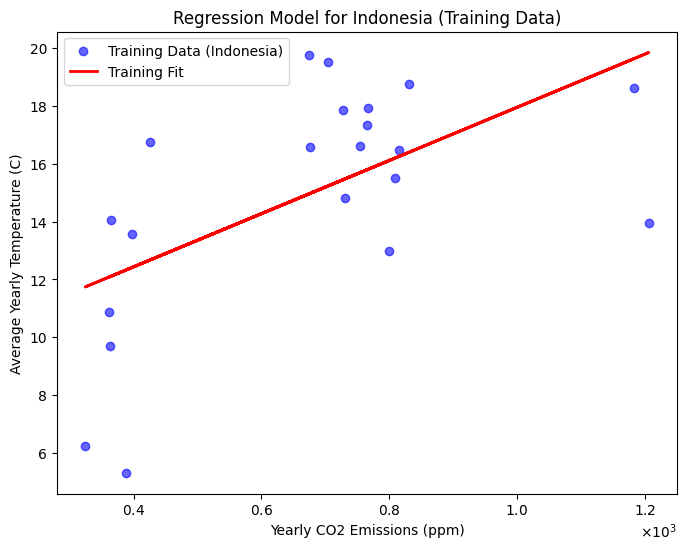

Mean Absolute Error (in Celcius): 2.9987576578312867


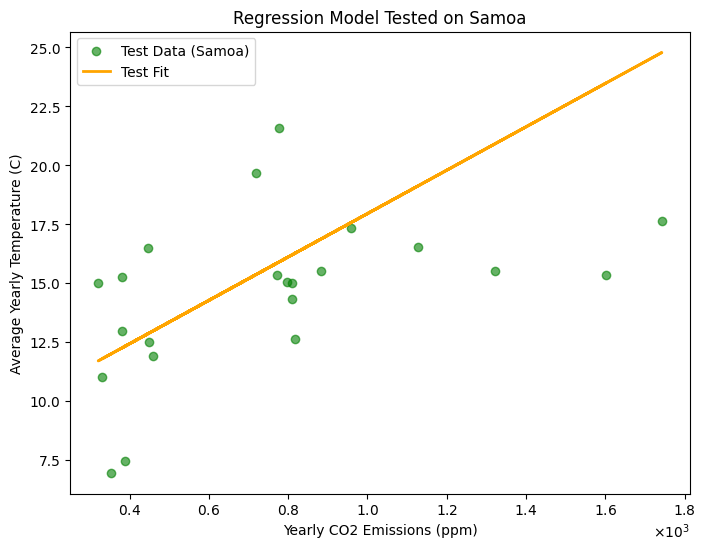

In [31]:
train_country = "Indonesia"  # Country to train the model
test_country = "Samoa"       # Country to test the model

# TRAINING

train_data = df[df['Country'] == train_country]
test_data = df[df['Country'] == test_country]

if train_data.empty or test_data.empty:
    print(f"No data available for training ({train_country}) or testing ({test_country}).")
else:

    X_train = train_data["CO2_emissions"].values.reshape(-1, 1)  
    Y_train = train_data["Average_Temperature"].values.reshape(-1, 1)  

    X_test = test_data["CO2_emissions"].values.reshape(-1, 1)  
    Y_test = test_data["Average_Temperature"].values.reshape(-1, 1)  

    # generate linear coefficients on training data
    X_train_with_bias = tf.concat([tf.ones((X_train.shape[0], 1)), X_train], axis=1)
    beta_linear = linear_coefs(X_train_with_bias, Y_train)
    Y_train_pred = tf.matmul(X_train_with_bias, beta_linear)

    # compute predictions on test data
    X_test_with_bias = tf.concat([tf.ones((X_test.shape[0], 1)), X_test], axis=1)
    Y_test_pred = tf.matmul(X_test_with_bias, beta_linear)

    # plot for training data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, Y_train, label=f"Training Data ({train_country})", color="blue", alpha=0.6)
    plt.plot(X_train, Y_train_pred, label="Training Fit", color="red", linewidth=2)

    plt.ylabel("Average Yearly Temperature (C)")
    plt.xlabel("Yearly CO2 Emissions (ppm)")
    plt.title(f"Regression Model for {train_country} (Training Data)")
    plt.legend()

    plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    plt.gca().xaxis.get_offset_text().set_fontsize(10)  
    plt.ticklabel_format(axis="x", style="scientific", scilimits=(0, 0))

    plt.show()

# TESTING
    
    # Evaluate accuracy of predictions on the test data
    mae_test = mean_absolute_error(Y_test, Y_test_pred.numpy())
    print(f"Mean Absolute Error (in Celcius): {mae_test}")
    
    # plot for test data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, Y_test, label=f"Test Data ({test_country})", color="green", alpha=0.6)
    plt.plot(X_test, Y_test_pred, label="Test Fit", color="orange", linewidth=2)

    plt.ylabel("Average Yearly Temperature (C)")
    plt.xlabel("Yearly CO2 Emissions (ppm)")
    plt.title(f"Regression Model Tested on {test_country}")
    plt.legend()

    plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    plt.gca().xaxis.get_offset_text().set_fontsize(10)  
    plt.ticklabel_format(axis="x", style="scientific", scilimits=(0, 0))

    plt.show()

# Linear Regression (2) - aggregating for all the countries
- Input: Aggregate yearly CO2 emissions 
- Out: Average Global Temperature

In [32]:
path = "/Users/laurenfeldman/COMP 562/ML-Climate-Project/clean-data/C02_2_global_averages.csv"
df = pd.read_csv(path)

X_raw = df['CO2_emissions'].values.reshape(-1, 1)  
Y_raw = df['Average_Temperature'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X_raw, Y_raw, test_size=0.2, random_state=42)

X = X_train
Y = Y_train

In [33]:
def linear_coefs(X, Y):
  """
  Args:
    X: N x d matrix of input features
    Y: N x 1 matrix (column vector) of output response

  Returns:
    Beta: d x 1 matrix of linear coefficients
  """
  #Use Normal Equation (X^T*X)(beta) = (X^T * Y) to find linear coefficients
  x_tf = tf.constant(X, dtype=tf.float32)
  y_tf = tf.constant(Y, dtype=tf.float32)

  #Use Normal Equation (X^T*X)(beta) = (X^T * Y) to find linear coefficients

  XT_X = tf.matmul(tf.transpose(x_tf), x_tf)
  XT_Y = tf.matmul(tf.transpose(x_tf), y_tf)
  beta = tf.linalg.solve(XT_X, XT_Y).numpy()
  return beta 

#### Training the model and visualizing predictions

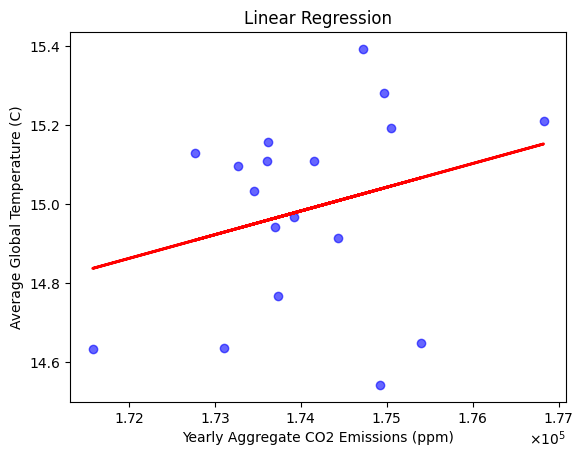

In [34]:
X_with_bias = tf.concat([tf.ones((X.shape[0], 1)), X], axis=1)
beta_linear = linear_coefs(X_with_bias, Y)
Y_linear_tf = tf.matmul(X_with_bias, beta_linear)

plt.scatter(X, Y, label="Actual Data", color="blue", alpha=0.6)
plt.plot(X, Y_linear_tf, label="Linear Fit", color="red", linewidth=2)
plt.ylabel("Average Global Temperature (C)")  
plt.xlabel("Yearly Aggregate CO2 Emissions (ppm)")  
plt.title("Linear Regression")  

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_offset_text().set_fontsize(10)  # Adjust font size of the offset text
plt.ticklabel_format(axis="x", style="scientific", scilimits=(0, 0))

plt.show()

#### Evaluating Accuracy of Test Data

Mean Absolute Error (Test Data): 0.21597299227216843


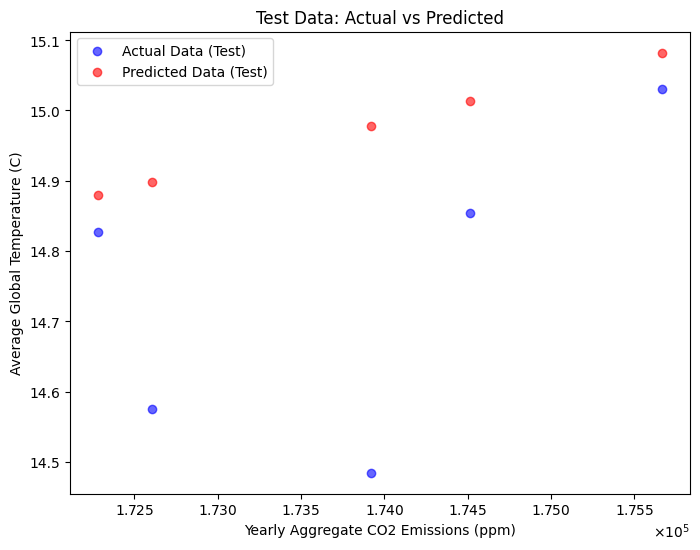

In [35]:
# Add bias term to the test data
X_test_with_bias = tf.concat([tf.ones((X_test.shape[0], 1)), X_test], axis=1)

# Predict on the test data using the trained model
Y_pred_test = tf.matmul(X_test_with_bias, beta_linear)

# Evaluate accuracy of predictions based on actual test y values
mae_test = mean_absolute_error(Y_test, Y_pred_test.numpy())
print(f"Mean Absolute Error (Test Data): {mae_test}")

# Visualize the predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, label="Actual Data (Test)", color="blue", alpha=0.6)
plt.scatter(X_test, Y_pred_test, label="Predicted Data (Test)", color="red", alpha=0.6)

plt.ylabel("Average Global Temperature (C)")
plt.xlabel("Yearly Aggregate CO2 Emissions (ppm)")
plt.title("Test Data: Actual vs Predicted")
plt.legend()
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_offset_text().set_fontsize(10)  # Adjust font size of the offset text
plt.ticklabel_format(axis="x", style="scientific", scilimits=(0, 0))
plt.show()

# Linear Regression (3) - predictions for every country
- Input: Aggregate yearly CO2 emissions per country 
- Out: Average Global Temperature

In [36]:
path = "/Users/laurenfeldman/COMP 562/ML-Climate-Project/clean-data/C02_2_country_averages.csv"
df = pd.read_csv(path)

X_raw = df['CO2_emissions'].values.reshape(-1, 1)  
Y_raw = df['Average_Temperature'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X_raw, Y_raw, test_size=0.2, random_state=42)

X = X_train
Y = Y_train

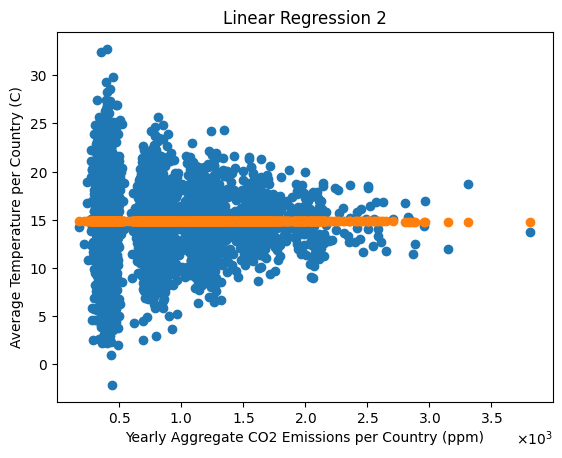

In [37]:
X_with_bias = tf.concat([tf.ones((X.shape[0], 1)), X], axis=1)
beta_linear = linear_coefs(X_with_bias, Y)
Y_linear_tf = tf.matmul(X_with_bias, beta_linear)
plt.scatter(X, Y)
plt.scatter(X, Y_linear_tf)
plt.ylabel("Average Temperature per Country (C)")  
plt.xlabel("Yearly Aggregate CO2 Emissions per Country (ppm)")  
plt.title("Linear Regression 2")  

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_offset_text().set_fontsize(10)  # Adjust font size of the offset text
plt.ticklabel_format(axis="x", style="scientific", scilimits=(0, 0))

plt.show()

# Linear Regression (4) - for top 5 countries
- Input: Yearly CO2 Emissions for 5 countries (with the most linear data)
- Output: Average Temperature 

In [38]:
path = "/Users/laurenfeldman/COMP 562/ML-Climate-Project/clean-data/C02_2_country_averages.csv"
df = pd.read_csv(path)

In [39]:
# Filter for countries with positive slopes
results = []
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    if country_data.empty:
        continue
    X = country_data["CO2_emissions"].values.reshape(-1, 1)  # Feature
    Y = country_data["Average_Temperature"].values.reshape(-1, 1)  # Target reshaped to 2D
    if len(X) < 2:
        continue
    # Perform linear regression using scipy
    slope, intercept, r_value, p_value, std_err = linregress(X.flatten(), Y.flatten())
    r_squared = r_value**2  # Calculate R^2
    if slope > 0:  # Only consider positive linear relationships
        results.append({'Country': country, 'R_squared': r_squared, 'Slope': slope, 'Intercept': intercept})

# Sort and select the top 5 countries
results_df = pd.DataFrame(results)
top_countries = results_df.sort_values(by='R_squared', ascending=False).head(5)
print("Top 5 countries with the strongest positive linear relationships:")
print(top_countries)

Top 5 countries with the strongest positive linear relationships:
       Country  R_squared     Slope  Intercept
50   Indonesia   0.332386  0.009197   8.752104
123      Tonga   0.295034  0.002609  10.236147
103    Uruguay   0.232312  0.005722  11.457467
86       Samoa   0.223310  0.003966  11.589233
38       Ghana   0.205019  0.003031  10.748972


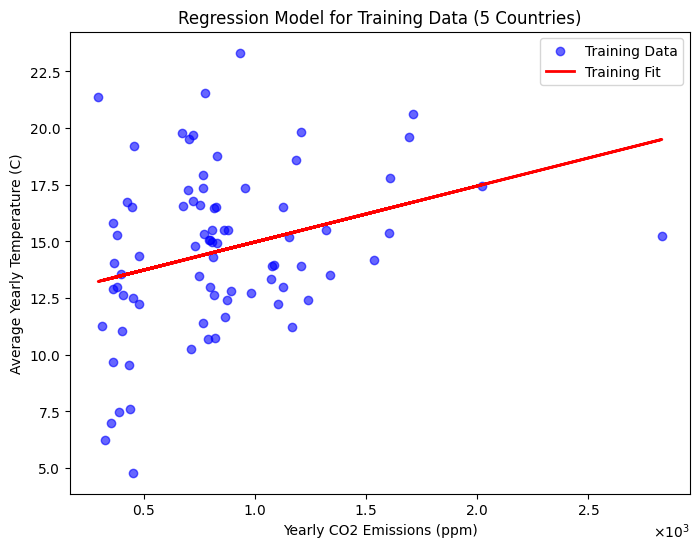

In [40]:
# top 5 countries with the strongest positive, linear relationships
countries = ["Indonesia", "Samoa", "Tonga", "Uruguay", "Ghana"]

# Filter the dataset to include only the specified countries
combined_data = df[df['Country'].isin(countries)]

if combined_data.empty:
    print("No data available for the specified countries.")
else:
    X = combined_data["CO2_emissions"].values.reshape(-1, 1)  # Feature
    Y = combined_data["Average_Temperature"].values.reshape(-1, 1)  # Target reshaped to 2D

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Add a bias term to the training data
    X_train_with_bias = tf.concat([tf.ones((X_train.shape[0], 1)), X_train], axis=1)

    # Train a single linear regression model on the training data
    beta_linear = linear_coefs(X_train_with_bias, Y_train)
    Y_train_pred = tf.matmul(X_train_with_bias, beta_linear)

    # Add a bias term to the test data
    X_test_with_bias = tf.concat([tf.ones((X_test.shape[0], 1)), X_test], axis=1)

    # Predict on the test data using the trained model
    Y_test_pred = tf.matmul(X_test_with_bias, beta_linear)

    # Initialize the plot for training data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, Y_train, label="Training Data", color="blue", alpha=0.6)
    plt.plot(X_train, Y_train_pred, label="Training Fit", color="red", linewidth=2)

    # Add labels, title, and legend
    plt.ylabel("Average Yearly Temperature (C)")
    plt.xlabel("Yearly CO2 Emissions (ppm)")
    plt.title("Regression Model for Training Data (5 Countries)")
    plt.legend()

    # Format x-axis in scientific notation
    plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    plt.gca().xaxis.get_offset_text().set_fontsize(10)  # Adjust font size of the offset text
    plt.ticklabel_format(axis="x", style="scientific", scilimits=(0, 0))

    # Show the training plot
    plt.show()


#### Evaluating the accuracy of the test data

Mean Absolute Error (Test Data): 2.9010347776255


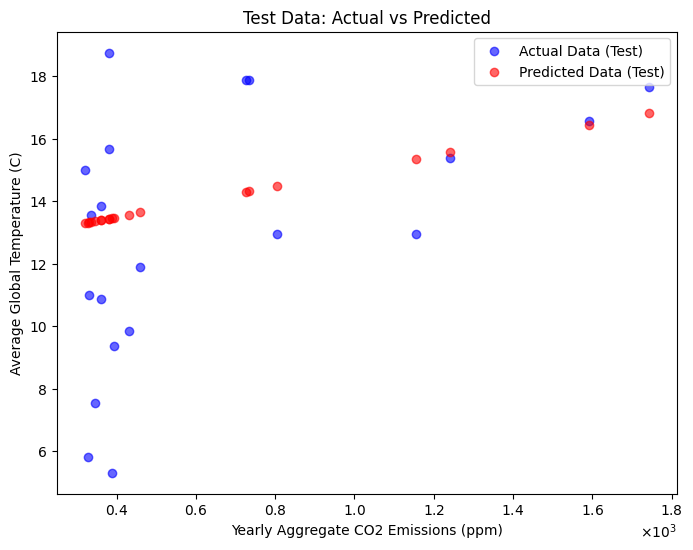

In [41]:
# Add bias term to the test data
X_test_with_bias = tf.concat([tf.ones((X_test.shape[0], 1)), X_test], axis=1)

# Predict on the test data using the trained model
Y_pred_test = tf.matmul(X_test_with_bias, beta_linear)

# Evaluate accuracy of predictions based on actual test y values
mae_test = mean_absolute_error(Y_test, Y_pred_test.numpy())
print(f"Mean Absolute Error (Test Data): {mae_test}")

# Visualize the predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, label="Actual Data (Test)", color="blue", alpha=0.6)
plt.scatter(X_test, Y_pred_test, label="Predicted Data (Test)", color="red", alpha=0.6)

plt.ylabel("Average Global Temperature (C)")
plt.xlabel("Yearly Aggregate CO2 Emissions (ppm)")
plt.title("Test Data: Actual vs Predicted")
plt.legend()
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_offset_text().set_fontsize(10)  # Adjust font size of the offset text
plt.ticklabel_format(axis="x", style="scientific", scilimits=(0, 0))
plt.show()

# Linear Regression (4) - for one country